In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
df.head(10)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0,XXXConfid


In [4]:
df.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,0,0,0,0,0,0,122,101,280.476824,94.870490,60.943092,234.520123,1.201190,0.238667,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,0,0,0,0,0,0,152,106,186.384436,95.410700,93.649735,367.986877,6.458060,8.687480,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,0,0,0,0,0,0,115,118,237.024558,156.267294,99.678209,294.802338,17.011003,1.972137,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,0,1,0,0,0,0,103,96,242.197192,52.482961,81.281111,145.253746,4.030491,5.173891,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,9.878711,0,0,0,0,0,0,166,78,283.396797,92.200064,81.920043,217.396873,11.114777,6.307543,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [5]:
df.shape

(2149, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print('total number of duplicate values : ',df.duplicated().sum())

total number of duplicate values :  0


In [11]:
# df.drop('PatientID',inplace=True,axis=1)

In [12]:
# null values in column of dtype object
j = 0
for i in df.columns:
    if (df[i].dtype == 'object' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [13]:
# null values in column of dtype int
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [14]:
# null values in column of dtype int
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [16]:
# zero values in column of dtype int
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        print(df[i].value_counts())                            # it will print the value counts / frequency table
        print()                                                # it will print space after each column
        j=j+1 
print('\nTotal Features: ', j)

1 .  Gender int64 1061
Gender
1    1088
0    1061
Name: count, dtype: int64

2 .  Ethnicity int64 1278
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

3 .  EducationLevel int64 446
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64

4 .  Smoking int64 1529
Smoking
0    1529
1     620
Name: count, dtype: int64

5 .  FamilyHistoryAlzheimers int64 1607
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64

6 .  CardiovascularDisease int64 1839
CardiovascularDisease
0    1839
1     310
Name: count, dtype: int64

7 .  Diabetes int64 1825
Diabetes
0    1825
1     324
Name: count, dtype: int64

8 .  Depression int64 1718
Depression
0    1718
1     431
Name: count, dtype: int64

9 .  HeadInjury int64 1950
HeadInjury
0    1950
1     199
Name: count, dtype: int64

10 .  Hypertension int64 1829
Hypertension
0    1829
1     320
Name: count, dtype: int64

11 .  MemoryComplaints int64 1702
MemoryComplaints
0    1702
1     447
Nam

In [17]:
# zero values in column of dtype float
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        print(df[i].value_counts())
        print()
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [18]:
df[df['MMSE'] == 0]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


In [19]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'object'):
        print(j+1,'. ',i ,df[i].dtype)
        print(df[i].value_counts())
        print()
        j=j+1 
print('\nTotal Features: ', j)

1 .  DoctorInCharge object
DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64


Total Features:  1


In [20]:
df.drop('DoctorInCharge',axis=1,inplace=True)

In [21]:
df.isna().sum().sum()

0

In [22]:
df.shape

(2149, 34)

In [23]:
correlation = df.corr()
correlation

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,1.000000,0.002947,-0.043665,-0.007608,-0.001729,-0.034228,0.021907,-0.020733,-0.011424,-0.018490,-0.026069,0.002187,0.017675,-0.003910,0.023736,-0.025100,-0.012668,-0.021153,-0.007634,0.004426,-0.024788,-0.010773,0.010452,-0.006777,0.025033,0.005748,-0.033700,-0.019787,0.004430,0.010772,-0.011987,0.029727,0.001448,0.041019
Age,0.002947,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,-0.018784,-0.015284,-0.005708,-0.008752,-0.040337,0.003954,-0.005324,-0.004462,0.000392,0.003588,0.006803,-0.003062,-0.004235,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,-0.043665,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,0.018421,0.034577,-0.018300,0.018113,0.004013,-0.002641,0.011657,-0.026059,-0.009568,0.016271,-0.005846,-0.012427,0.025330,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,-0.007608,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,0.022526,0.002347,-0.019588,-0.005411,-0.009364,0.012848,-0.027086,0.010310,-0.011757,0.007907,-0.021828,-0.007173,-0.012504,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.001729,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,0.032748,0.007528,0.003059,0.027573,-0.008951,-0.016950,-0.016782,-0.002553,-0.041598,0.050504,-0.008125,-0.025763,0.026090,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.034228,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,0.006446,-0.005467,-0.008980,-0.012507,0.016288,0.004928,-0.019275,-0.002524,0.001082,0.023684,0.038605,-0.018001,-0.003477,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.021907,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,-0.045811,0.027955,-0.035810,-0.039363,-0.019178,-0.021124,-0.024116,-0.014112,-0.010907,-0.007393,-0.025567,-0.021058,0.002139,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,-0.020733,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,-0.003707,-0.023632,0.000073,0.008867,-0.008301,-0.006010,-0.030070,-0.008909,-0.033944,-0.017042,-0.001925,0.023362,-0.011424,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.011424,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,-0.014106,0.003976,0.029880,-0.013533,0.025780,0.022081,-0.004811,-0.010555,0.014335,0.017789,-0.001993,0.027416,-0.008342,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.018490,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,-0.011261,-0.015220,0.009192,-0.002516,-0.008163,-0.043628,0.006031,0.009539,-0.016790,-0.023698,-0.008659,0.034734,0.021636,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506


<Axes: >

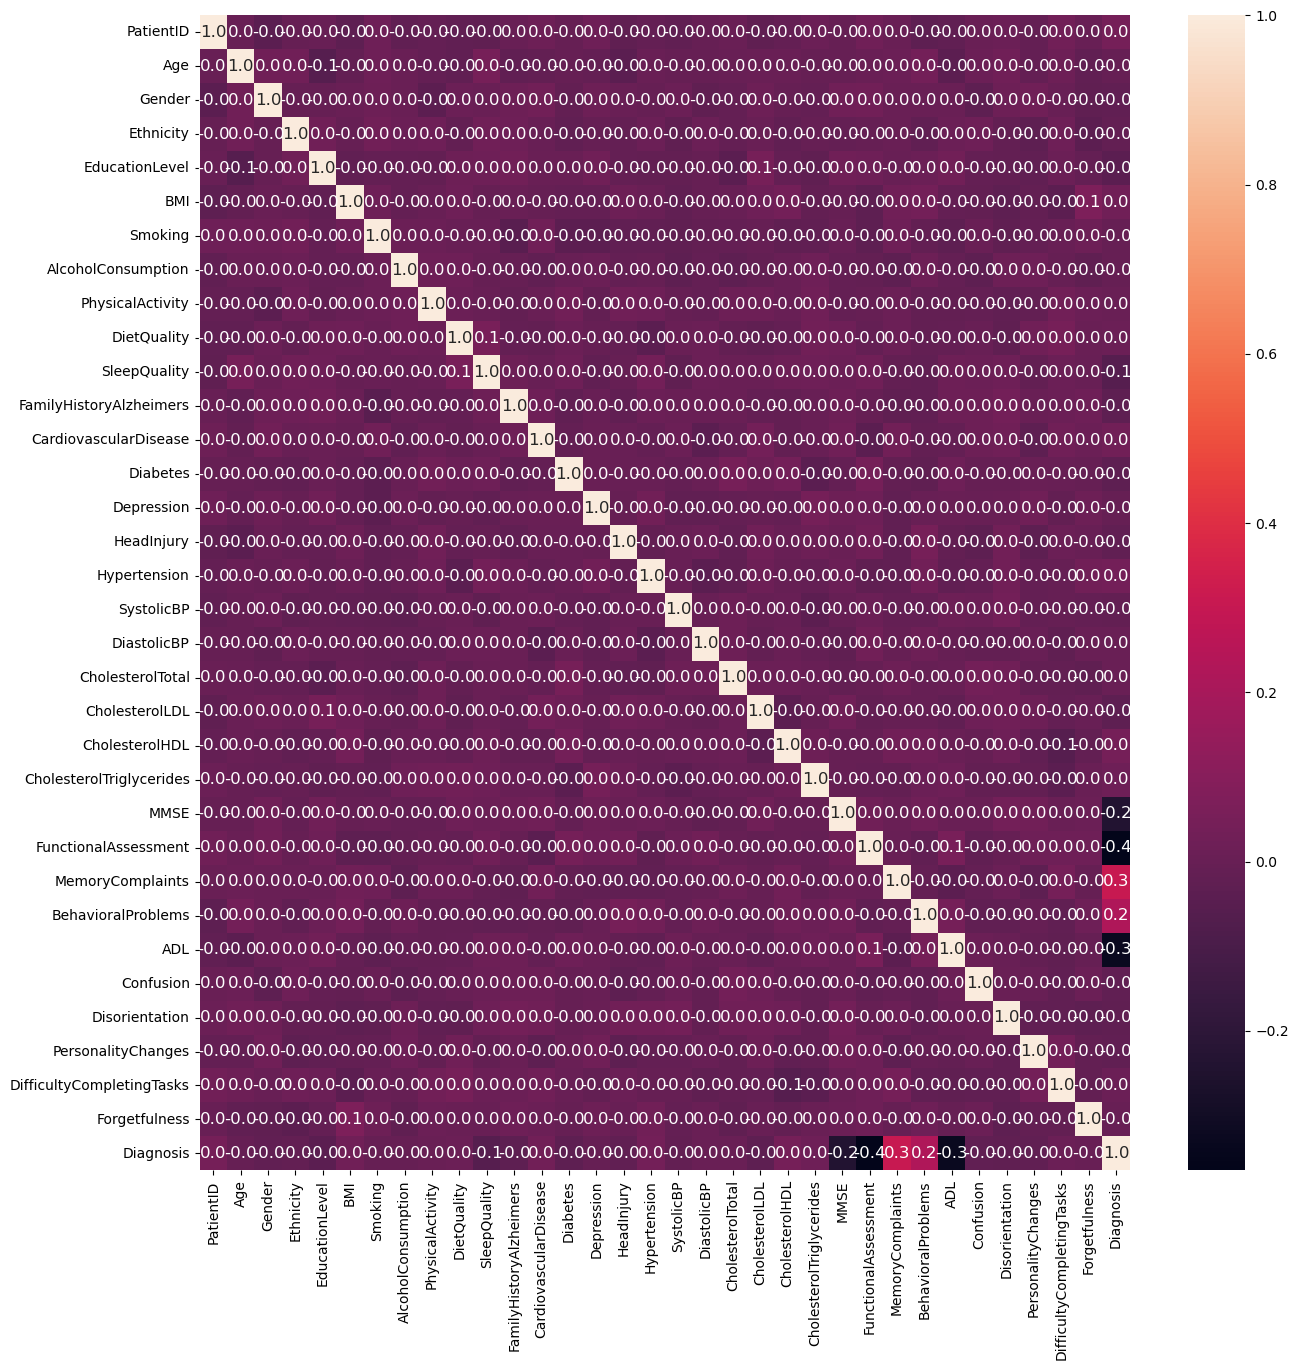

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation,fmt='.1f',
            annot=True,annot_kws={'size':12})

In [25]:
li = []
target = ['Diagnosis','MMSE']
j = 0
for column in df.columns:
    if ((correlation[column] < 0).sum()) >= 17:
        if column not in target:
            print(j,'.',column,(correlation[column] < 0).sum())
            li.append(column)
            j = j+1

0 . PatientID 19
1 . Age 17
2 . Ethnicity 18
3 . EducationLevel 20
4 . BMI 19
5 . Smoking 20
6 . AlcoholConsumption 21
7 . PhysicalActivity 17
8 . Diabetes 20
9 . HeadInjury 19
10 . Hypertension 20
11 . SystolicBP 21
12 . DiastolicBP 19
13 . CholesterolTotal 17
14 . CholesterolLDL 17
15 . CholesterolHDL 19
16 . CholesterolTriglycerides 20
17 . FunctionalAssessment 17
18 . MemoryComplaints 17
19 . BehavioralProblems 18
20 . ADL 17
21 . Confusion 17
22 . PersonalityChanges 22
23 . DifficultyCompletingTasks 17
24 . Forgetfulness 17


In [26]:
print(li)

['PatientID', 'Age', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'Diabetes', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


In [27]:
df.drop(['PatientID', 'Age','Ethnicity','EducationLevel', 'BMI','Smoking', 'AlcoholConsumption','Diabetes','PhysicalActivity', 'HeadInjury', 'Hypertension','DiastolicBP', 'SystolicBP', 'CholesterolTotal','CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides','PersonalityChanges', 'Forgetfulness',  'DifficultyCompletingTasks'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2149 non-null   int64  
 1   DietQuality              2149 non-null   float64
 2   SleepQuality             2149 non-null   float64
 3   FamilyHistoryAlzheimers  2149 non-null   int64  
 4   CardiovascularDisease    2149 non-null   int64  
 5   Depression               2149 non-null   int64  
 6   MMSE                     2149 non-null   float64
 7   FunctionalAssessment     2149 non-null   float64
 8   MemoryComplaints         2149 non-null   int64  
 9   BehavioralProblems       2149 non-null   int64  
 10  ADL                      2149 non-null   float64
 11  Confusion                2149 non-null   int64  
 12  Disorientation           2149 non-null   int64  
 13  Diagnosis                2149 non-null   int64  
dtypes: float64(5), int64(9)


In [28]:
li = []
target = ['Diagnosis','MMSE']
j = 0
for column in df.columns:
    if ((correlation[column] < 0).sum()) >= 17:
        if column not in target:
            print(j,'.',column,(correlation[column] < 0).sum())
            li.append(column)
            j = j+1

0 . FunctionalAssessment 17
1 . MemoryComplaints 17
2 . BehavioralProblems 18
3 . ADL 17
4 . Confusion 17


<Axes: >

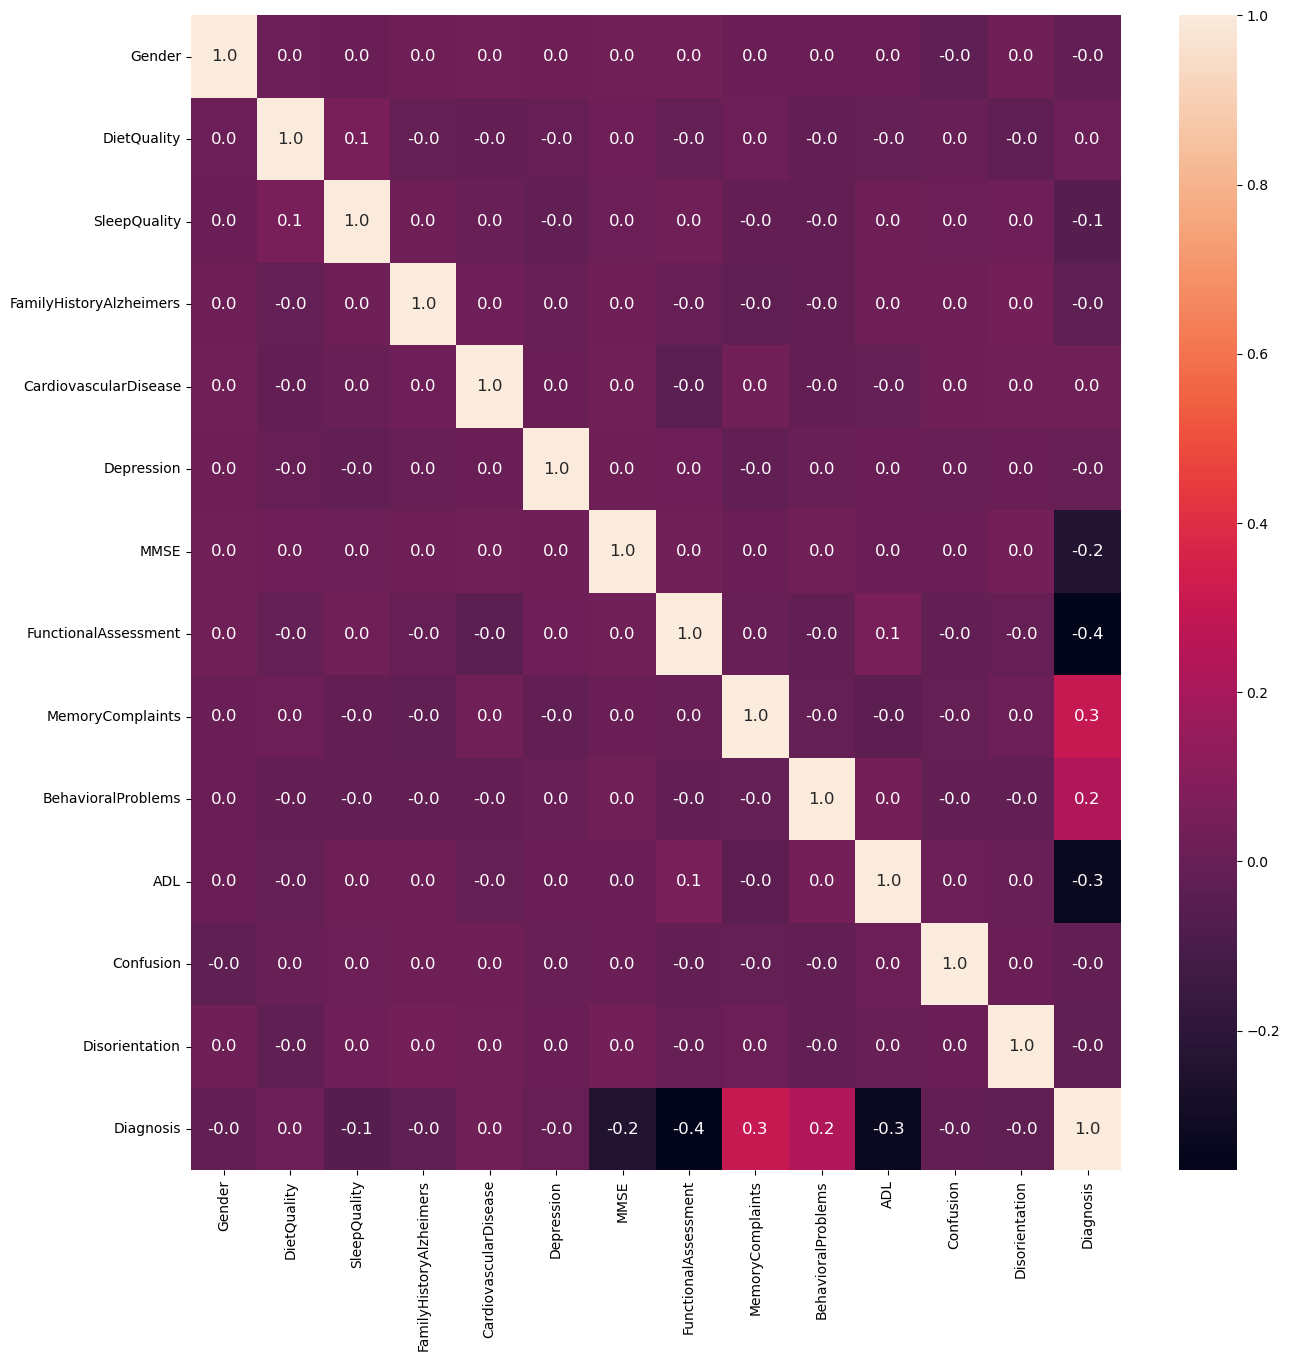

In [29]:
correlation = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation,fmt='.1f',
            annot=True,annot_kws={'size':12})

In [30]:
li = []
j = 0
for column in df.columns:
    if ((correlation[column] < 0).sum()) >= 8:
        print(j,'.',column)
        li.append(column)
        j = j+1

0 . BehavioralProblems
1 . Diagnosis


<Axes: >

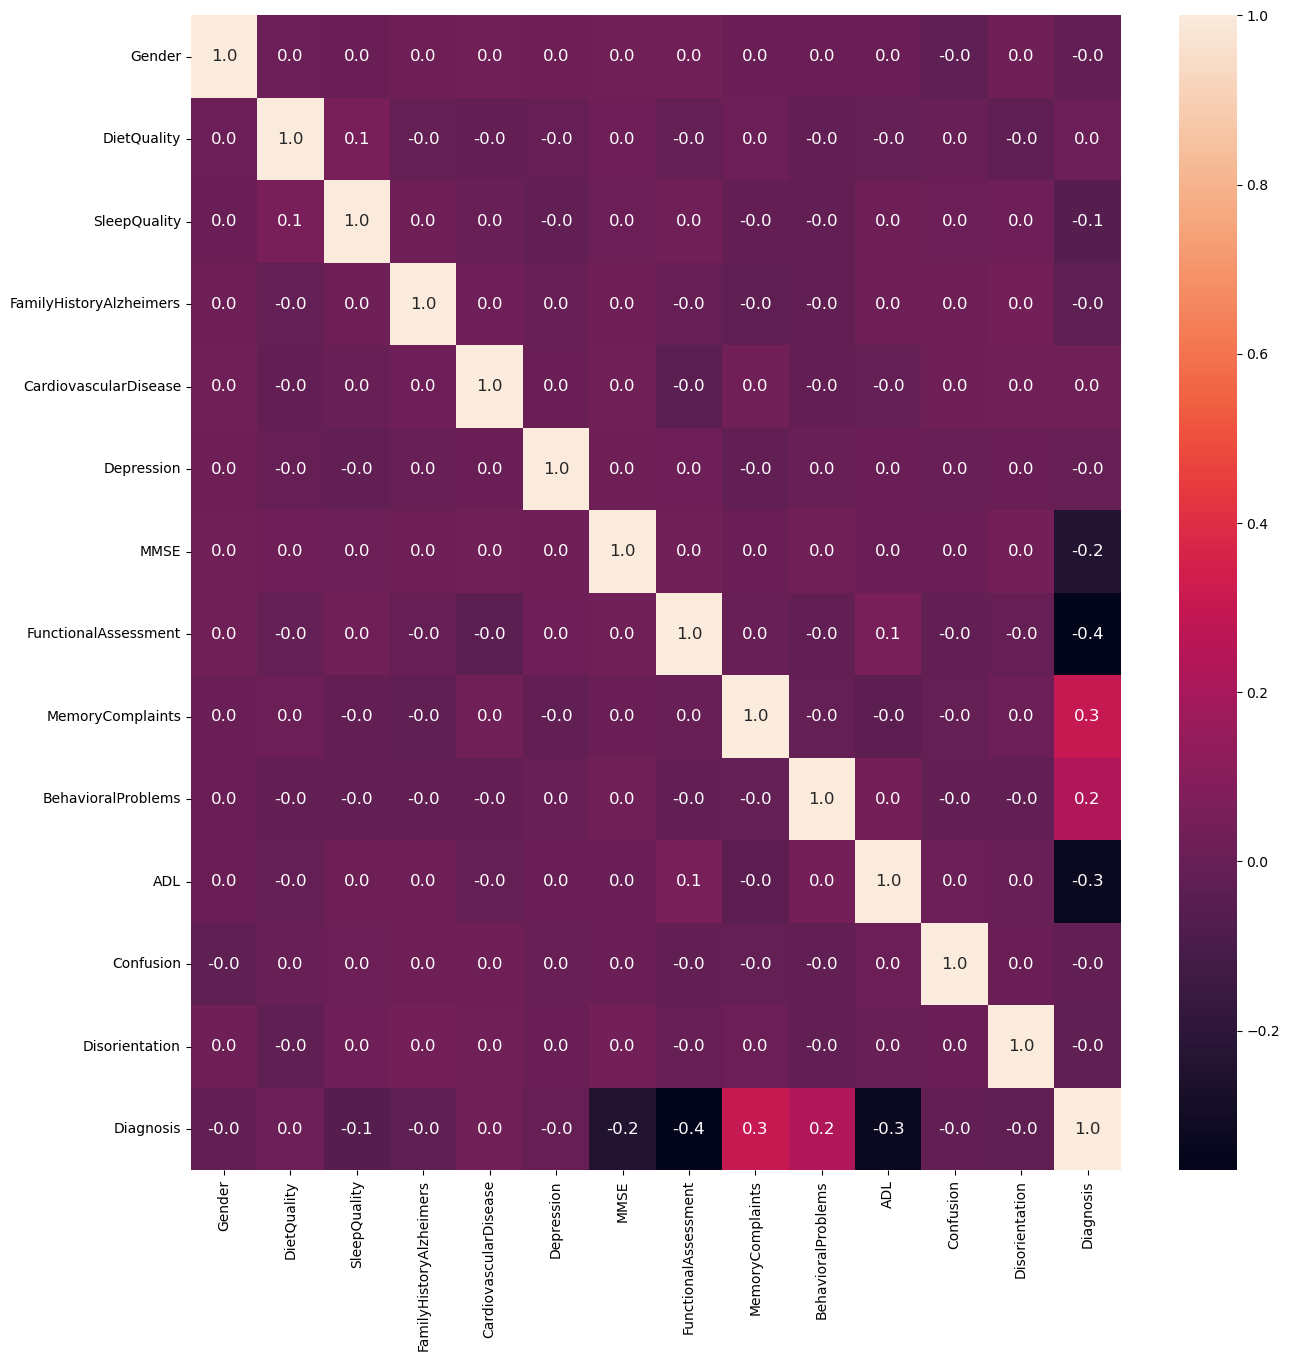

In [31]:
correlation = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation,fmt='.1f',
            annot=True,annot_kws={'size':12})

# Predicting Disease 

In [32]:
df.columns

Index(['Gender', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers',
       'CardiovascularDisease', 'Depression', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'Diagnosis'],
      dtype='object')

In [33]:
X = df.drop('Diagnosis',axis=1)
Y = df['Diagnosis']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2149 non-null   int64  
 1   DietQuality              2149 non-null   float64
 2   SleepQuality             2149 non-null   float64
 3   FamilyHistoryAlzheimers  2149 non-null   int64  
 4   CardiovascularDisease    2149 non-null   int64  
 5   Depression               2149 non-null   int64  
 6   MMSE                     2149 non-null   float64
 7   FunctionalAssessment     2149 non-null   float64
 8   MemoryComplaints         2149 non-null   int64  
 9   BehavioralProblems       2149 non-null   int64  
 10  ADL                      2149 non-null   float64
 11  Confusion                2149 non-null   int64  
 12  Disorientation           2149 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 218.4 KB


In [35]:
X.shape

(2149, 13)

In [36]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2149 entries, 0 to 2148
Series name: Diagnosis
Non-Null Count  Dtype
--------------  -----
2149 non-null   int64
dtypes: int64(1)
memory usage: 16.9 KB


In [37]:
Y.shape

(2149,)

In [39]:
from sklearn.model_selection  import train_test_split

X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.25, random_state=30)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   1611
Size of Train Y =   1611
Size of Test X =   538
Size of Test Y =   538


## <u>GaussianNB Base Classifier</u>

In [40]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
#fit the regressor whit X and Y data 
gnb.fit(X_TRAIN,Y_TRAIN)

GaussianNB()

In [41]:
# accuracy for prediction on training data
training_data_prediction = gnb.predict(X_TRAIN)
print(training_data_prediction)

[1 0 0 ... 0 0 0]


### prediction on train Data

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8063314711359404


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TRAIN, training_data_prediction)

array([[923, 135],
       [177, 376]], dtype=int64)

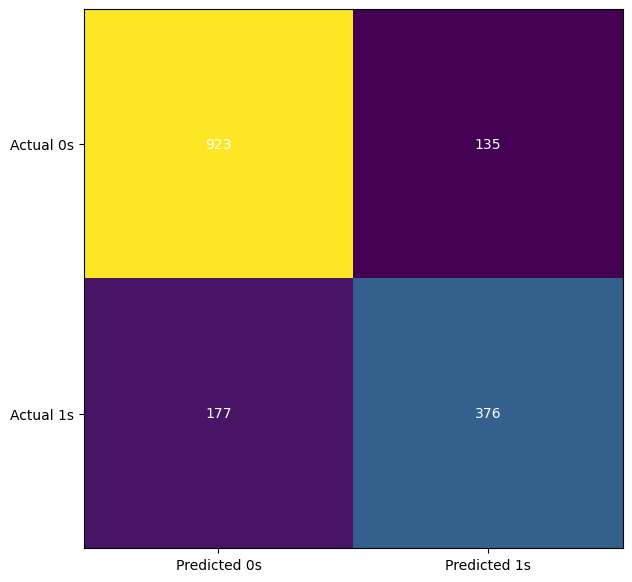

In [44]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [45]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1058
           1       0.74      0.68      0.71       553

    accuracy                           0.81      1611
   macro avg       0.79      0.78      0.78      1611
weighted avg       0.80      0.81      0.80      1611



# Testing

In [46]:
# accuracy for prediction on training data
testing_data_prediction = gnb.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8029739776951673


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[291,  40],
       [ 66, 141]], dtype=int64)

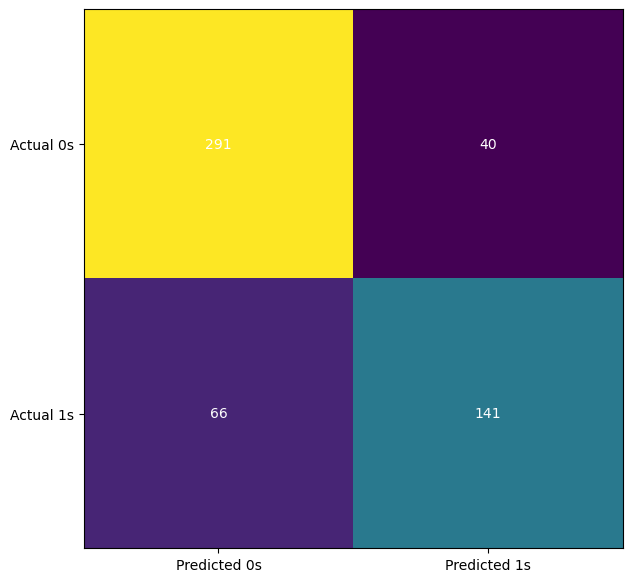

In [49]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
for i in range(2): 
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [51]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       331
           1       0.78      0.68      0.73       207

    accuracy                           0.80       538
   macro avg       0.80      0.78      0.79       538
weighted avg       0.80      0.80      0.80       538



# Logestic Regresssion


In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state=10)
lr.fit(X_TRAIN, Y_TRAIN)

LogisticRegression(random_state=10, solver='liblinear')

In [53]:
lr.classes_

array([0, 1], dtype=int64)

In [54]:
lr.intercept_

array([3.35456993])

In [55]:
lr.coef_

array([[-5.94411384e-02,  3.99365450e-02,  1.94963756e-03,
        -3.03831517e-02,  2.66913686e-01, -1.77378911e-01,
        -1.04915137e-01, -4.05629213e-01,  2.38970413e+00,
         2.27439856e+00, -3.65802214e-01, -1.14439904e-01,
        -1.62747139e-01]])

# Prediction on Train Data

In [57]:
# accuracy for prediction on training data
training_data_prediction = lr.predict(X_TRAIN)
print(training_data_prediction)


[1 1 0 ... 0 0 0]


In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8497827436374923


In [59]:
# The Accuracy of Prediction is 0.8355329949238579
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[973,  85],
       [157, 396]], dtype=int64)

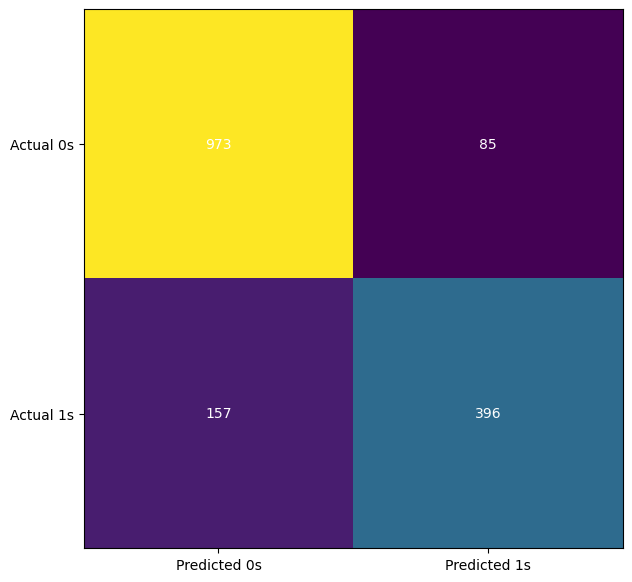

In [60]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',color='white')
plt.show()


In [61]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1058
           1       0.82      0.72      0.77       553

    accuracy                           0.85      1611
   macro avg       0.84      0.82      0.83      1611
weighted avg       0.85      0.85      0.85      1611



# Testing

In [63]:
# accuracy for prediction on training data
testing_data_prediction = lr.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 

In [64]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy) 

The Accuracy of Prediction is  0.845724907063197


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[300,  31],
       [ 52, 155]], dtype=int64)

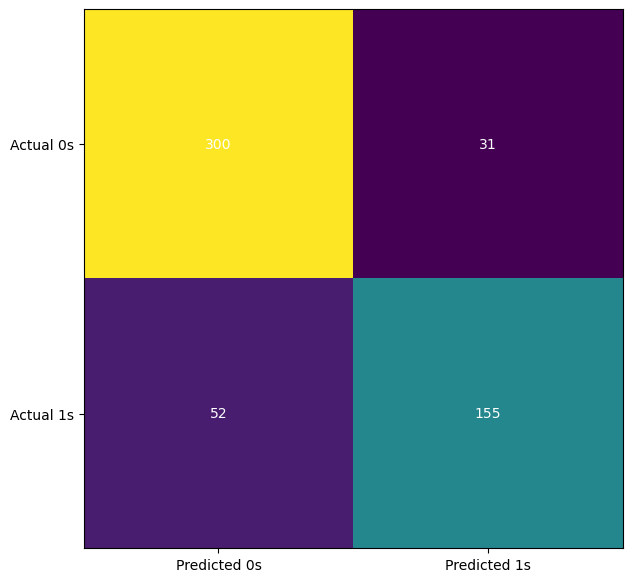

In [66]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i, j],ha='center',va='center',color='white')
plt.show()


In [67]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       331
           1       0.83      0.75      0.79       207

    accuracy                           0.85       538
   macro avg       0.84      0.83      0.83       538
weighted avg       0.84      0.85      0.84       538



# SVM CLASSIFIER

In [68]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svc = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svc.fit(X_TRAIN,Y_TRAIN)

SVC(kernel='linear')

# Prediction on Train Data

In [70]:
# accuracy for prediction on training data
training_data_prediction = svc.predict(X_TRAIN)
print(training_data_prediction)

[1 1 0 ... 0 0 0]


In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8485412787088765


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TRAIN, training_data_prediction)

array([[962,  96],
       [148, 405]], dtype=int64)

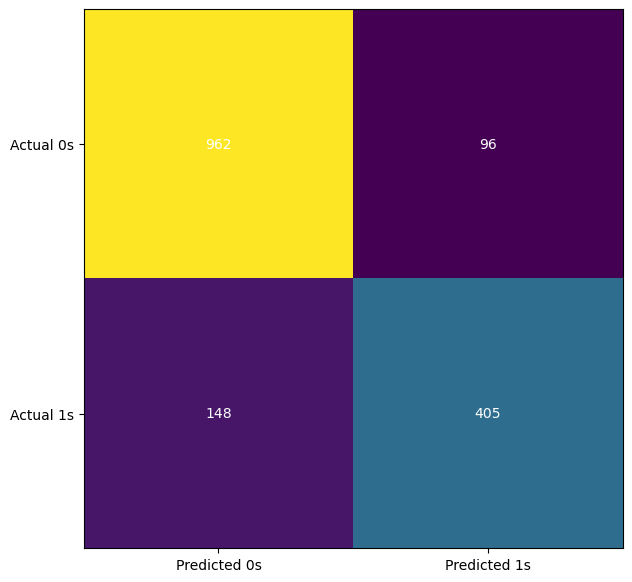

In [73]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [74]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1058
           1       0.81      0.73      0.77       553

    accuracy                           0.85      1611
   macro avg       0.84      0.82      0.83      1611
weighted avg       0.85      0.85      0.85      1611



# Testing on Test Data

In [75]:
# accuracy for prediction on training data
testing_data_prediction = lr.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 

In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.845724907063197


In [77]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y_TEST, testing_data_prediction)

array([[300,  31],
       [ 52, 155]], dtype=int64)

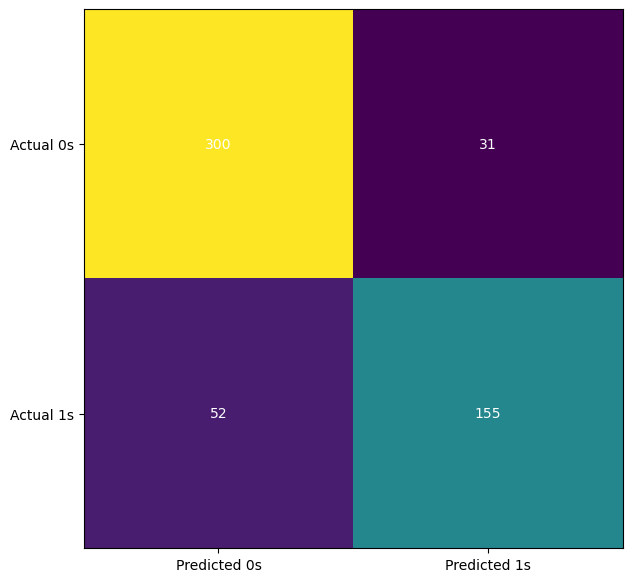

In [78]:
import matplotlib.pyplot as plt
cm =confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [80]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       331
           1       0.83      0.75      0.79       207

    accuracy                           0.85       538
   macro avg       0.84      0.83      0.83       538
weighted avg       0.84      0.85      0.84       538



# DECISION TREE CLASSIFIER

In [81]:
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# initialize decision tree classifier
dtree = DecisionTreeClassifier(random_state=30)
# train the classifier
dtree.fit(X_TRAIN, Y_TRAIN)

DecisionTreeClassifier(random_state=30)

# Prediction on Train Data


In [82]:
# accuracy for prediction on training data
training_data_prediction = dtree.predict(X_TRAIN)
print(training_data_prediction)


[1 1 0 ... 0 0 0]


In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  1.0


In [84]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[1058,    0],
       [   0,  553]], dtype=int64)

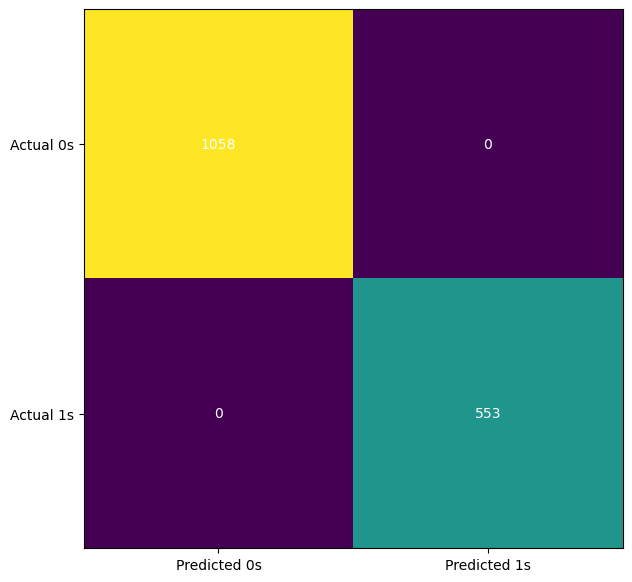

In [85]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [86]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1058
           1       1.00      1.00      1.00       553

    accuracy                           1.00      1611
   macro avg       1.00      1.00      1.00      1611
weighted avg       1.00      1.00      1.00      1611



# Prediction on Test Data

In [87]:
# accuracy for prediction on training data
testing_data_prediction = dtree.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 1 0 1 0 0 

In [88]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.895910780669145


In [89]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[298,  33],
       [ 23, 184]], dtype=int64)

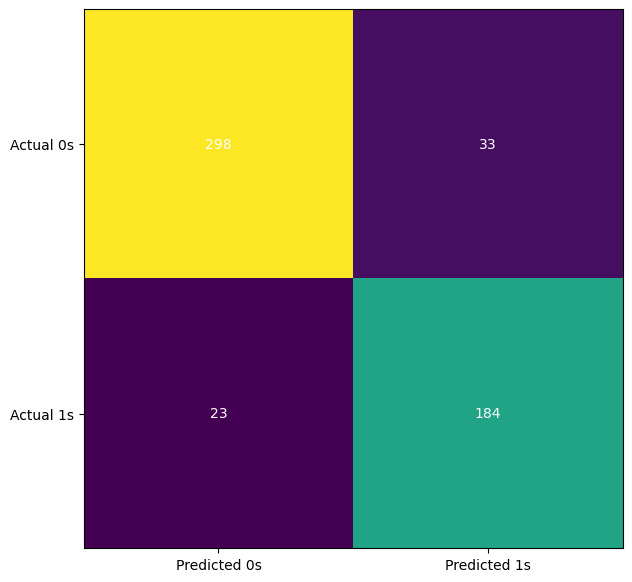

In [90]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
 for j in range(2):
     ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [91]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       331
           1       0.85      0.89      0.87       207

    accuracy                           0.90       538
   macro avg       0.89      0.89      0.89       538
weighted avg       0.90      0.90      0.90       538



# RANDOM FOREST CLASSIFIER

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=7, random_state=15)
# train the classifier
rf_model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(n_estimators=7, random_state=15)

# Prediction on Training Data

In [93]:
# accuracy for prediction on training data
training_data_prediction = rf_model.predict(X_TRAIN)
training_data_prediction

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9913097454996896


In [95]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[1055,    3],
       [  11,  542]], dtype=int64)

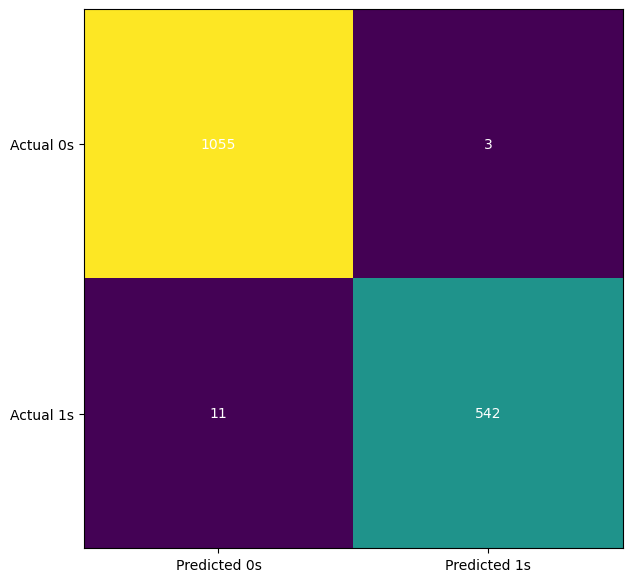

In [96]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [97]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1058
           1       0.99      0.98      0.99       553

    accuracy                           0.99      1611
   macro avg       0.99      0.99      0.99      1611
weighted avg       0.99      0.99      0.99      1611



# Prediction on Test Data

In [98]:
# accuracy for prediction on training data
testing_data_prediction = rf_model.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 

In [99]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.929368029739777


In [100]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[316,  15],
       [ 23, 184]], dtype=int64)

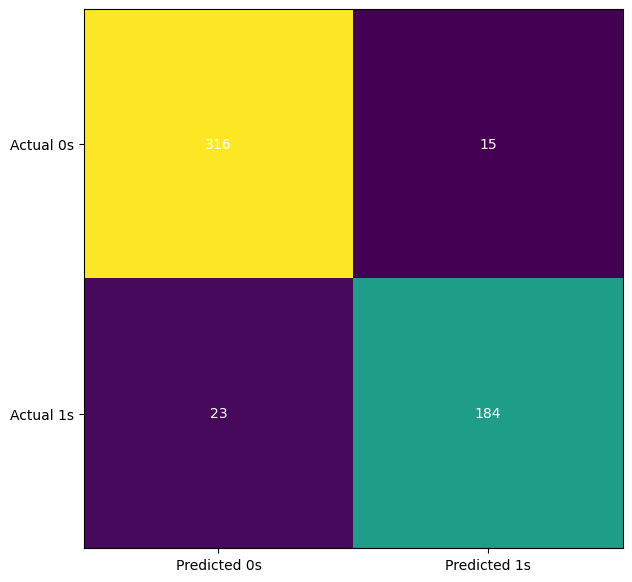

In [101]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [102]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       331
           1       0.92      0.89      0.91       207

    accuracy                           0.93       538
   macro avg       0.93      0.92      0.92       538
weighted avg       0.93      0.93      0.93       538



# Hyperparmater tuning using GridSearchCV
## GridSearchCV is a scikit-learn function that automates the 
## hyperparameter tuning process¶
## and helps to find the best hyperparameters for a given machine 
## learning model.

In [103]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter to fine tune
param_grid = {
 'max_depth': range(1, 10, 1),
 'min_samples_leaf': range(1, 20, 2),
 'min_samples_split': range(3, 20, 2),
 'criterion': ["entropy", "gini"]
}
# Decision tree classifier
tree = DecisionTreeClassifier(random_state=5)
# GridSearchCV
# CV=Cross Validation
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
cv=5, verbose=True)
grid_search.fit(X_TRAIN, Y_TRAIN)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(3, 20, 2)},
             verbose=True)

In [104]:
#Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9509605215083745
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=15, random_state=5)


In [105]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1058
           1       0.99      0.98      0.99       553

    accuracy                           0.99      1611
   macro avg       0.99      0.99      0.99      1611
weighted avg       0.99      0.99      0.99      1611



In [106]:
# accuracy for prediction on training data
training_data_prediction = grid_search.predict(X_TRAIN)
training_data_prediction

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.957790192427064


In [108]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[1032,   26],
       [  42,  511]], dtype=int64)

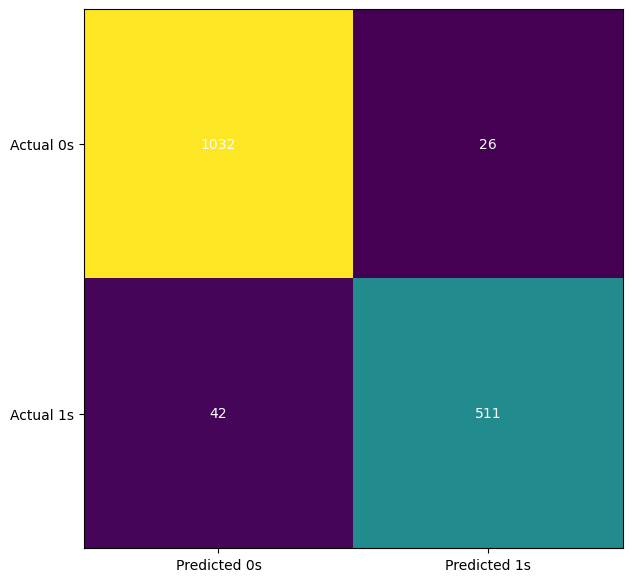

In [109]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TRAIN, training_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

# Testing

In [110]:
# accuracy for prediction on test data
testing_data_prediction = grid_search.predict(X_TEST)
print(testing_data_prediction)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 

In [111]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9405204460966543


In [112]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[315,  16],
       [ 16, 191]], dtype=int64)

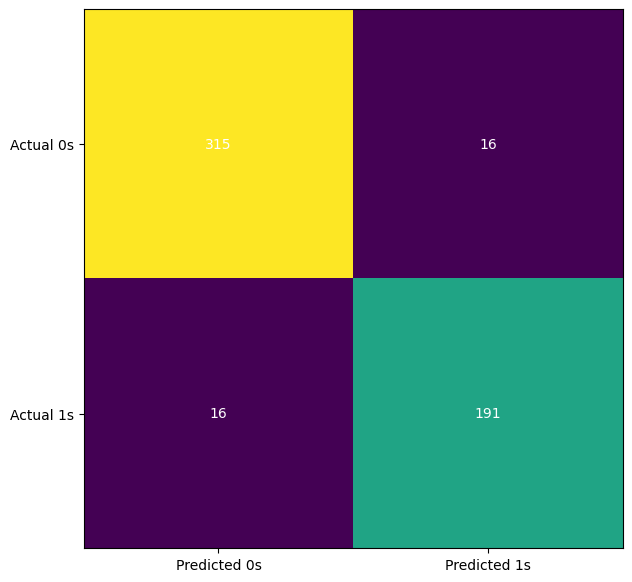

In [113]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_TEST, testing_data_prediction)
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', 
color='white')
plt.show()

In [114]:
report = classification_report(Y_TEST, testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       331
           1       0.92      0.92      0.92       207

    accuracy                           0.94       538
   macro avg       0.94      0.94      0.94       538
weighted avg       0.94      0.94      0.94       538

